# Exploring ZTF supernovae with Fink and SNN

In [6]:
df = spark.read.format('parquet').load('ztf_alerts/science_reprocessed/year=2019/month=11')

In [7]:
# Number of alerts that survived quality cuts
df.count()

1515953

In [8]:
df_snia = df.filter(df['snnscore'] > 0.75)\
    .filter(df['cdsxmatch'].isin(['Unknown', 'Galaxy', 'Seyfert']))\
    .filter(df['candidate.ndethist'] < 150)\
    .filter(df['candidate.drb'] > 0.5)

In [9]:
# Number of alerts
df_snia.count()

33043

In [10]:
# unique objectId
df_snia.groupBy('objectId').count().count()

19854

In [11]:
# Load TNS data
df_tns = spark.read.format('csv').option('inferSchema', True).option('header', True).load('tns')

cols = [
    'Name', '`Obj. Type`', 'Redshift', 
    '`Disc. Internal Name`', 'Discovery Date (UT)', 
    'Discovery Filter'
]
df_tns.select(cols).show()

+----------+---------+--------+-------------------+-------------------+----------------+
|      Name|Obj. Type|Redshift|Disc. Internal Name|Discovery Date (UT)|Discovery Filter|
+----------+---------+--------+-------------------+-------------------+----------------+
|SN 2020buq|    SN Ia|  0.0864|       ZTF20aalyeut|2020-01-31 11:06:38|           g-ZTF|
|SN 2020bua|    SN Ia|    0.07|       ZTF20aajbsxt|2020-01-26 08:57:07|           g-ZTF|
|SN 2020bro|    SN Ia|    0.09|       ZTF20aaivego|2020-01-26 03:57:59|           g-ZTF|
|SN 2020bqi|    SN Ia|    0.11|       ZTF20aaknzba|2020-01-30 12:05:07|           g-ZTF|
|SN 2020bpi|    SN Ia|   0.041|       ZTF20aakyoez|2020-01-30 12:16:34|           g-ZTF|
|SN 2020boo|    SN Ia|  0.0664|       ZTF20aajvcwd|2020-01-28 12:08:15|           g-ZTF|
|SN 2020bol|    SN Ia|    0.08|       ZTF20aakfofq|2020-01-31 04:41:28|           g-ZTF|
|SN 2020boc|    SN Ia| 0.04987|       ZTF18adcdcrd|2020-01-31 04:52:31|           g-ZTF|
|SN 2020blz|    SN Ia

In [12]:
df_all = df_snia.join(df_tns, df_snia['objectId'] == df_tns['`Disc. Internal Name`'])

In [13]:
cols = ['objectId', 'snnscore', '`Obj. Type`', 'Redshift', 'Discovery Date (UT)']
df_all.select(cols).orderBy('snnscore', ascending=False).show()

+------------+------------------+---------+--------+-------------------+
|    objectId|          snnscore|Obj. Type|Redshift|Discovery Date (UT)|
+------------+------------------+---------+--------+-------------------+
|ZTF19acqypso|0.9403911828994751|    SN Ia|    0.07|2019-11-08 06:11:31|
|ZTF19acqypso|0.9393153190612793|    SN Ia|    0.07|2019-11-08 06:11:31|
|ZTF19acqypso|0.9390793442726135|    SN Ia|    0.07|2019-11-08 06:11:31|
|ZTF19acgqjln|0.9388836622238159|    SN Ia|    0.05|2019-10-23 03:28:37|
|ZTF19acqypso|0.9353110194206238|    SN Ia|    0.07|2019-11-08 06:11:31|
|ZTF19acqypso| 0.934328556060791|    SN Ia|    0.07|2019-11-08 06:11:31|
|ZTF19acetxvq|0.9323999881744385|    SN Ia|   0.063|2019-10-15 03:02:48|
|ZTF19acetxvq|0.9317749738693237|    SN Ia|   0.063|2019-10-15 03:02:48|
|ZTF19achagst| 0.931272566318512|    SN Ia|   0.068|2019-10-22 11:45:50|
|ZTF19acetxvq|0.9304450750350952|    SN Ia|   0.063|2019-10-15 03:02:48|
|ZTF19acetxvq|0.9284504055976868|    SN Ia|   0.063

In [14]:
alerts = df_all.filter(df_all['objectId'] == 'ZTF19acnjwgm').collect()

INFO: Auto-setting vmin to  1.751e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.155e+02 [aplpy.core]


INFO: Auto-setting vmin to  2.006e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.345e+02 [aplpy.core]


INFO: Auto-setting vmin to -3.315e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.757e+01 [aplpy.core]


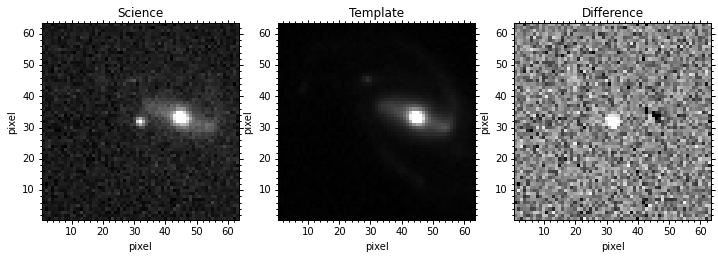

In [16]:
from fink_client.visualisation import show_stamps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
for alert in alerts[0:1]:
    fig = plt.figure(figsize=(12, 7))
    show_stamps(alert, fig)

In [17]:
import ipyaladin.aladin_widget as ipyal

In [21]:
aladin= ipyal.Aladin(survey= 'P/DSS2/red',
                              fov= 10,
                              target= 'LMC',
                              reticle_color= '#ff89ff')
aladin

Aladin(fov=10.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'o…

In [22]:
aladin_bis = ipyal.Aladin(survey='P/PanSTARRS/DR1/color-z-zg-g', target='{} {}'.format(alerts[0]['candidate']['ra'], alerts[0]['candidate']['dec']), fov=8./60.)
aladin_bis

Aladin(fov=0.13333333333333333, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'over…